In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split

In [8]:
songs = pd.read_csv("./train csv/train.csv")
feature_cols = ['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                'tempo']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(songs, songs['isLiked'], test_size=0.20, random_state=43)

X_trainFeat = X_train[feature_cols]  # Features
X_testFeat = X_test[feature_cols]

clf = DecisionTreeClassifier()
clf = clf.fit(X_trainFeat, y_train)

y_pred = clf.predict(X_testFeat[feature_cols])

#output in new csv file
results = X_test.copy()
results['isLiked'] = y_pred
results = results[['name', 'isLiked']]
results.to_csv("results.csv", index=False)

[Text(430.125, 509.625, 'energy <= 0.732\ngini = 0.468\nsamples = 75\nvalue = [28, 47]'),
 Text(209.25, 441.675, 'tempo <= 99.579\ngini = 0.499\nsamples = 48\nvalue = [25, 23]'),
 Text(93.0, 373.725, 'valence <= 0.258\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(46.5, 305.775, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(139.5, 305.775, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(325.5, 373.725, 'liveness <= 0.133\ngini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(232.5, 305.775, 'danceability <= 0.789\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(186.0, 237.825, 'valence <= 0.537\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(139.5, 169.875, 'acousticness <= 0.258\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(93.0, 101.92500000000001, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(186.0, 101.92500000000001, 'acousticness <= 0.911\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(139.5, 33.97500000000002, 'gini = 0.0\nsamples = 3\nvalue = 

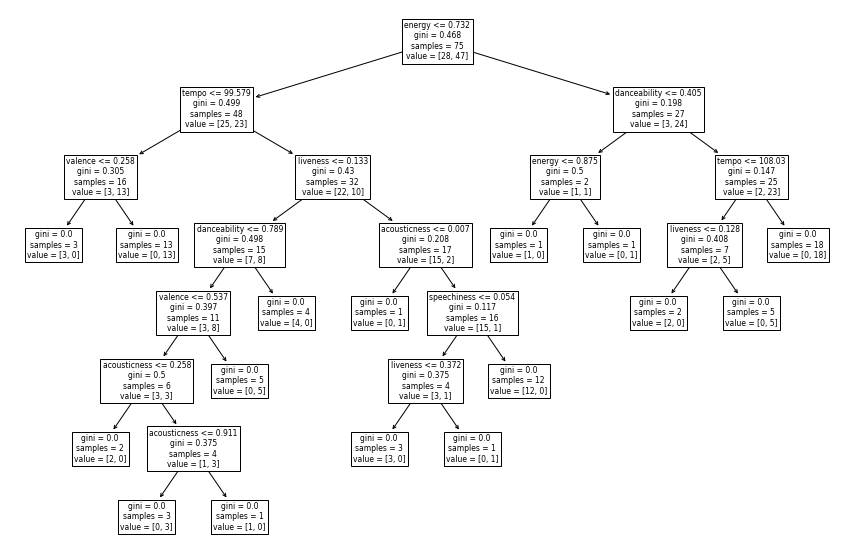

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=feature_cols)

In [16]:
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_cols)
print(tree_rules)

|--- energy <= 0.73
|   |--- tempo <= 99.58
|   |   |--- valence <= 0.26
|   |   |   |--- class: 0
|   |   |--- valence >  0.26
|   |   |   |--- class: 1
|   |--- tempo >  99.58
|   |   |--- liveness <= 0.13
|   |   |   |--- danceability <= 0.79
|   |   |   |   |--- valence <= 0.54
|   |   |   |   |   |--- acousticness <= 0.26
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- acousticness >  0.26
|   |   |   |   |   |   |--- acousticness <= 0.91
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- acousticness >  0.91
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- valence >  0.54
|   |   |   |   |   |--- class: 1
|   |   |   |--- danceability >  0.79
|   |   |   |   |--- class: 0
|   |   |--- liveness >  0.13
|   |   |   |--- acousticness <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- acousticness >  0.01
|   |   |   |   |--- speechiness <= 0.05
|   |   |   |   |   |--- liveness <= 0.37
|   |   |   |   |   |   |--- class: 0
|   |  

## Recommend Songs

### Discover Weekly

In [12]:
new_songs = pd.read_csv("./new songs from reco/discoverweekly.csv")
new_songsFeat = new_songs[feature_cols]
results = new_songs.copy()
results['isLiked'] = clf.predict(new_songsFeat)
results = results[['name', 'isLiked']]
results.to_csv("./new songs from reco/discoverweeklyresults.csv", index=False)